# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the 
beautiful Scikit-Learn library

what are we going to cover:

0. An end to end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together    

## 0. An end-to-end Scikit-Learn workflow

In [1]:
import numpy as np

In [2]:
# 1. Get the data ready
import pandas as pd
hrt_dis = pd.read_csv('data/heart-disease.csv')
hrt_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (feature matrix)
x = hrt_dis.drop('target', axis = 1)

# Create y (labels)
y = hrt_dis['target']

In [21]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Will keep the default hyperparameters
# clf.get_params()

In [22]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [25]:
clf.fit(x_train, y_train);

In [7]:
# Make a prediction
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [8]:
y_test

53     1
2      1
38     1
222    0
200    0
      ..
232    0
115    1
58     1
8      1
269    0
Name: target, Length: 61, dtype: int64

In [9]:
# 4 Evaluate the model
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)

0.7213114754098361

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.69      0.81      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[19, 11],
       [ 6, 25]])

In [13]:
accuracy_score(y_test, y_preds)

0.7213114754098361

In [14]:
# Not happy with this accuracy 
# 5. Improve our model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 101, 10):
    print(f'Trying model with {i} estimators.')
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f'Model accuracy on the test set: {clf.score(x_test, y_test) * 100:.2f}%', end = '\n\n')

Trying model with 10 estimators.
Model accuracy on the test set: 72.13%

Trying model with 20 estimators.
Model accuracy on the test set: 72.13%

Trying model with 30 estimators.
Model accuracy on the test set: 70.49%

Trying model with 40 estimators.
Model accuracy on the test set: 70.49%

Trying model with 50 estimators.
Model accuracy on the test set: 70.49%

Trying model with 60 estimators.
Model accuracy on the test set: 73.77%

Trying model with 70 estimators.
Model accuracy on the test set: 72.13%

Trying model with 80 estimators.
Model accuracy on the test set: 72.13%

Trying model with 90 estimators.
Model accuracy on the test set: 70.49%

Trying model with 100 estimators.
Model accuracy on the test set: 72.13%



In [15]:
# 6. Save and load a trained model
import pickle

pickle.dump(clf, open('first_model.pkl', 'wb'))

In [16]:
loaded_model = pickle.load(open('first_model.pkl', 'rb'))

In [19]:
loaded_model.score(x_test, y_test)

0.7213114754098361

In [20]:
loaded_model.score(x_test, y_test)

0.7213114754098361

In [26]:
import sklearn

In [27]:
sklearn.show_versions()


System:
    python: 3.11.0 (main, Mar  1 2023, 12:33:14) [Clang 14.0.6 ]
executable: /Users/tanbeerjubaer/Desktop/ml/sample_project/env/bin/python
   machine: macOS-13.1-arm64-arm-64bit

Python dependencies:
      sklearn: 1.2.1
          pip: 23.0.1
   setuptools: 65.6.3
        numpy: 1.23.5
        scipy: 1.10.0
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: /Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/libopenblasp-r0.3.21.dylib
         prefix: libopenblas
       user_api: blas
   internal_api: openblas
        version: 0.3.21
    num_threads: 8
threading_layer: pthreads
   architecture: armv8

       filepath: /Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/libomp.dylib
         prefix: libomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 8


In [28]:
print('hello world')

hello world


In [29]:
# How to deal with warning!
# import warnings
# warnings.filterwarnings('default')

In [1]:
# Standard imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels(usually 'x', 'y')    
    2. Fillling (also called imputing) or disregarding missing values
    3. Convering non numerical values to numerical values (aka feature encoding


In [32]:
hrt_dis.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
x = hrt_dis.drop('target', axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [34]:
y = hrt_dis['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [35]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
x_train.shape, y_train.shape

((242, 13), (242,))

## 1.1 Make sure the data's are numerical

In [38]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [40]:
car_sales.shape, car_sales.dtypes

((1000, 5),
 Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object)

In [41]:
# Try to predict the price of a car!!

In [42]:
x = car_sales.drop('Price', axis = 1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [43]:
y = car_sales['Price']
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [44]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
x_train.size, x_test.size

(3200, 800)

In [46]:
x.size

4000

In [47]:
# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [51]:
# Turn the catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  catagorical_features)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x[:5]

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.47140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.54365e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.81577e+05]])

In [53]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [52]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [55]:
car_sales['Make'].head(20)

0      Honda
1        BMW
2      Honda
3     Toyota
4     Nissan
5      Honda
6     Toyota
7      Honda
8     Nissan
9      Honda
10    Nissan
11    Nissan
12    Nissan
13    Nissan
14     Honda
15    Toyota
16    Toyota
17       BMW
18    Nissan
19    Nissan
Name: Make, dtype: object

In [56]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [57]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
model.score(x_train, y_train)

0.891612713353635

In [59]:
model.score(x_test, y_test)

0.3235867221569877

## What if there were missing values?

1. Fill them with some values (aka imputation).
2. Remove the data with missing values altogether


In [64]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.shape

(1000, 5)

In [65]:
# How many missing values?
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [66]:
# Let's convert our data to numbers

In [67]:
x = car_sales_missing.drop('Price', axis = 1)
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [68]:
y = car_sales_missing['Price']

In [69]:
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

In [73]:
# Turn the catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,catagorical_features)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### Option 1. Fill missing data's with pandas


In [74]:
# Fill the make colour and doors collumn

In [75]:
car_sales_missing['Make'].fillna('missing', inplace = True)
car_sales_missing['Colour'].fillna('missing', inplace = True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace = True)
car_sales_missing['Doors'].fillna(4, inplace = True)

In [76]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [77]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace = True)


In [78]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [79]:
# nice all are done

In [80]:
car_sales_missing.shape

(950, 5)

In [81]:
x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [83]:
# Turn the catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  catagorical_features)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [84]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2. Fill missing values with Scikit-Learn

In [86]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [87]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [88]:
car_sales_missing.dropna(subset = ['Price'], inplace=True)

In [89]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [90]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# Ei section kichuta kom bujhechi

In [91]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical data with missing and numerical with mean or assumptions
car_imputer = SimpleImputer(strategy='constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy='constant', fill_value = 4)
num_imputer = SimpleImputer(strategy='mean')


# define columns
car_features = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# Create an Imputer (something that fill's missing data)
imputer = ColumnTransformer([
    ('car_imputer', car_imputer, car_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])


# Transform the data
filled_x = imputer.fit_transform(x)

In [92]:
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [96]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns = ['Make', 'Colour', 'Doors', 'Odometer (KM)'])

In [98]:
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [99]:
# Now check if there is missing values?
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [100]:
# sheii

In [ ]:
# x = car_sales_filled

In [103]:
# Turn the catagories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  catagorical_features)],
                                remainder = 'passthrough')

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [105]:
# Let's fit a model
np.random.seed(42)

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

# Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [1]:
# 30 march 23

## 2. Choosing the right estimators/algorithm for our problem

Scikit-Learn uses estimators as another term for machine learning model or algorithm

* Classification - predicting weather a sample is one thing or another
* Regression - Pretending a number

Step 1 - Check the machine learning map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for regression problem

In [2]:
# Import boston housing dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes;

In [14]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
diabetes_df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
diabetes_df['target'] = pd.Series(diabetes['target'])
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
# How many samples?
len(diabetes_df)

442

In [22]:
# Let's try the Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# Setup random seed
np.random.seed(42)


# Create the data
x = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Intantiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

# check the score of the Ridge model on test data
ans = model.score(x_test, y_test)
print(f'our model is {ans*100:.2f}% accurate')

our model is 41.92% accurate


# How do we imporve the score?

* What if Ridge wasn't working

check the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [26]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(x_test, y_test)

0.42417421495301266

In [28]:
# data set tai valo na mone hoy
# but process ta bujhchi

### 2.2 Choosing a estimator for a classification problem

Let's go to the map.. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [30]:
hrt_dis = pd.read_csv('data/heart-disease.csv')
hrt_dis.shape

(303, 14)

In [35]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup the random seed
np.random.seed(4)

# Create the data
x = hrt_dis.drop('target', axis=1)
y = hrt_dis['target']

# Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()

# Fit the data in the model
clf.fit(x_train, y_train)

# Evaluate the Linear SVC
clf.score(x_test, y_test)

/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5573770491803278

In [34]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(4)

# Create the data
x = hrt_dis.drop('target', axis=1)
y = hrt_dis['target']

# Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the data in the model
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifier
clf.score(x_test, y_test)

0.9016393442622951

## So Random Forest is better
Tips:

    * If you have structured data, use ensemble methods
    * If you have unstructured data, use deep learning or transfer learning

In [36]:
what_to_cover= [
'0. An end to end scikit learn workflow',
'1. Getting the data ready',
'2. Choose the right estimator/algorithm for our problems',
'3. Fit the model/algorithm and use it to make predictions on our data',
'4. Evaluating a model',
'5. Improve a model',
'6. Save and load a trained model',
'7. Putting it all together']

In [37]:
what_to_cover

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## Fit the model/algorithm on our data and use it to make prediction

### 3.1 Fitting the model to the data

In [40]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(4)

# Create the data
x = hrt_dis.drop('target', axis=1) #feature variable
y = hrt_dis['target'] # target variable

# Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier()

# Fit the data in the model
clf.fit(x_train, y_train)

# Evaluate the Random Forest Classifier
res = clf.score(x_test, y_test)
res

0.9016393442622951

### Make prediction using a machine learning model

2 ways to make a prediction
1. 'predict()' 
2. 'predict_proba()'

In [41]:
# Use a trained model to make a predictions
clf.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [43]:
np.array(y_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [44]:
# Compare Predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.9016393442622951

In [46]:
# One more way
from sklearn.metrics import accuracy_score
accuracy_score(y_preds, y_test)

0.9016393442622951

# Make prediction with predict_proba()

In [49]:
# It returns probablities of a classification label
clf.predict_proba(x_test[:10])

array([[0.54, 0.46],
       [0.6 , 0.4 ],
       [0.15, 0.85],
       [0.01, 0.99],
       [0.67, 0.33],
       [0.73, 0.27],
       [0.66, 0.34],
       [0.07, 0.93],
       [0.32, 0.68],
       [0.25, 0.75]])

In [50]:
# humm makes sense

In [54]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(4)

# Create the data
x = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)

# Make prediction
y_preds = model.predict(x_test)


In [55]:
y_preds[:10]

array([101.19431176, 135.90101798, 165.12415951,  75.83459791,
       168.56861297, 141.67373066, 132.64255494, 130.76015522,
        92.93131411, 101.30946576])

In [56]:
np.array(y_test[:10])

array([128.,  69., 174.,  72., 167., 302., 160., 178.,  51.,  77.])

In [58]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

45.28706035101427

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators/algorithm
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric function.


In [59]:
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(4)

# Create the data
x = hrt_dis.drop('target', axis=1) #feature variable
y = hrt_dis['target'] # target variable

# Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)


RandomForestClassifier()

In [60]:
# 4.1
clf.score(x_train, y_train)

1.0

In [61]:
clf.score(x_test, y_test)

0.9016393442622951

## 4.2 Evaluating a model using the scoring parameter

In [68]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

# Create the data
x = hrt_dis.drop('target', axis=1) #feature variable
y = hrt_dis['target'] # target variable

# Split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train);

In [69]:
clf.score(x_test, y_test)

0.8524590163934426

In [70]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [71]:
cross_val_score(clf, x, y, cv = 10)
# Eta data take split kore ney

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [72]:
np.random.seed(42)

# Single training ans test split score
clfs = clf.score(x_test, y_test)

# Take the mean of the 5-fold cross-validation score
clfv = np.mean(cross_val_score(clf, x, y))

# Compare the two
clfs, clfv

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of the classifier = mean accuracy
clf.score()

In [74]:
# Scoring parameter set to None by default
np.random.seed(42)
ans = cross_val_score(clf, x, y, cv = 5, scoring=None)
print(f'Highest accuracy: {max(ans)}.')

Highest accuracy: 0.9016393442622951.


## 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [75]:
what_to_cover

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
x = hrt_dis.drop('target', axis=1) #feature variable
y = hrt_dis['target'] # target variable

clf = RandomForestClassifier()
cvs = cross_val_score(clf, x, y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

**Area under the reciver operating characteristic curve(AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curves are a comparision of a model's true positive rate (tpr) vs a model's false positive rate(fpr)

* True positive = model predicts true when truth is true
* False positive = model predicrts true when truth is false
* True negetive = model predicts 0 when truth is 0
* False negetive = model predicts true when truth is 1

In [80]:
from sklearn.metrics import roc_curve

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf.fit(x_train, y_train)

# Make predictions with probablity
y_prb = clf.predict_proba(x_test)
y_prb[:10]

array([[0.38, 0.62],
       [0.03, 0.97],
       [0.92, 0.08],
       [0.4 , 0.6 ],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.76, 0.24],
       [0.59, 0.41],
       [0.5 , 0.5 ]])

In [82]:
y_prb_positive = y_prb[:, 1]
y_prb_positive[:10]

array([0.62, 0.97, 0.08, 0.6 , 0.91, 0.98, 0.89, 0.24, 0.41, 0.5 ])

In [83]:
# Calculate fpr, tpr and thresholds
fpr, tpr, threshold = roc_curve(y_test, y_prb_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.20689655,
       0.20689655, 0.27586207, 0.27586207, 0.4137931 , 0.48275862,
       0.55172414, 0.55172414, 0.72413793, 0.79310345, 0.93103448,
       1.        ])

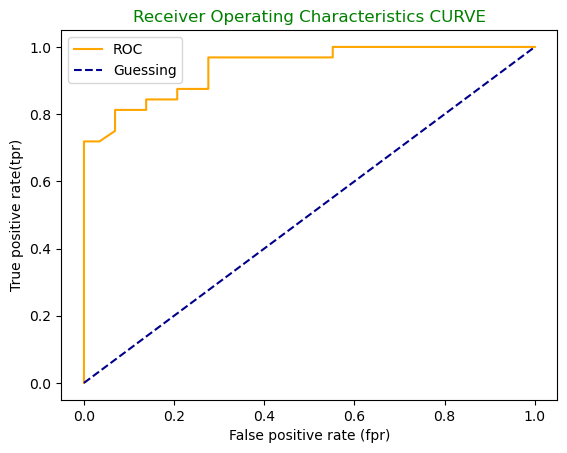

In [90]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC curve using the given fpr and tpr of a model
    '''
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label = 'ROC')
    
    # Plot baseline
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.title('Receiver Operating Characteristics CURVE', color='green')
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [91]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prb_positive)

0.9401939655172413

**Confusion metrics**

A confusion matrix is a quick way to compare the labels a model predicts and the
actual labels it was supposed to predict

In essence, giving you an idea where the model is getting confused.

In [92]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 5, 27]])

In [93]:
y_preds

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [97]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels--v'],
            colnames=['Predicted Labels -->'])

Predicted Labels -->,0,1
Actual Labels--v,,
0,24,5
1,5,27


In [99]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



## Package Plan ##

  environment location: /Users/tanbeerjubaer/Desktop/ml/sample_project/env

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.12.2             |  py311hca03da5_0         580 KB
    ------------------------------------------------------------
                                           Total:         580 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.12.2-py311hca03da5_0 



                                              

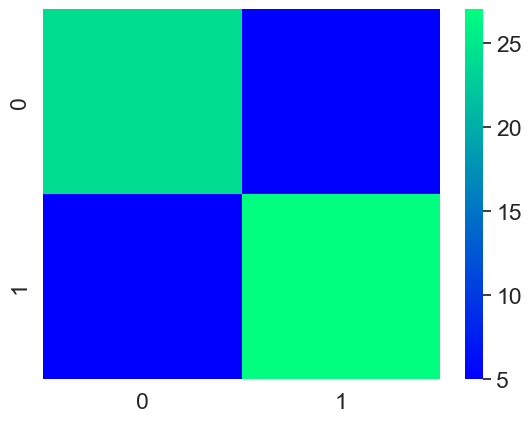

In [104]:
# Make our confusion matrixx more visual with Seaborn's heatmap()
import seaborn as sb

# Set the font scale
sb.set(font_scale=1.5)
con_mat = confusion_matrix(y_test, y_preds)
sb.heatmap(con_mat, cmap='winter');

Plots a confusion matrix using Seaborn's heatmap


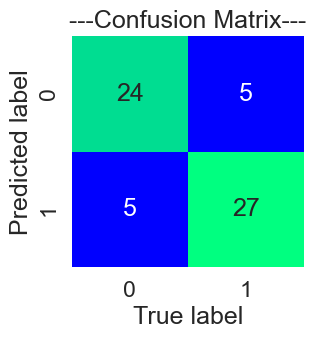

In [106]:
def plot_con_mat(con_mat):
    print('''Plots a confusion matrix using Seaborn's heatmap''')
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sb.heatmap(con_mat,
                    cmap='winter',
                    annot=True,
                    cbar=False)
    ax.set(title='---Confusion Matrix---',
           xlabel='True label',
           ylabel='Predicted label'
       );
    
plot_con_mat(con_mat)

**Clssification report**

In [107]:
what_to_cover

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [116]:
print(classification_report(dis_true, dis_preds))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [112]:
# Where precision and recall become valuable
dis_true = np.zeros(10000)
dis_true[0] = 1 # Only one positive case

dis_preds = np.zeros(10000)
pd.DataFrame(classification_report(dis_true,
                                   dis_preds,
                                   output_dict=True))

/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [113]:
# Extra visit - model_evaluation scikit-learn

In [114]:
what_to_cover

['0. An end to end scikit learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

### 4.2.2 Regression model evaluation matrics

1. R^2 or co-efficient of determination
2. Mean absolute error
3. Mean squared error

* What r-squared does compares your model predictions with the mean of the targets. Values 
  can range from negetive infinity to 1

In [9]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train);

In [10]:
model.score(x_test, y_test)

0.42417421495301266

In [11]:
from sklearn.metrics import r2_score

# Fill an array y test mean
yt_mean = np.full(len(y_test), y_test.mean())
yt_mean

array([145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7752809,
       145.7752809, 145.7752809, 145.7752809, 145.7752809, 145.7

In [ ]:
**

In [12]:
r2_score(y_test, yt_mean)

0.0

In [13]:
r2_score(y_test, y_test)

1.0

In [15]:
y_preds = model.predict(x_test)
r2_score(y_test, y_preds)

0.42417421495301266

***Mean Absolute Error***

In [16]:
from sklearn.metrics import mean_absolute_error

mea = mean_absolute_error(y_test, y_preds)
mea

44.53921348314607

In [21]:
df = pd.DataFrame(data={'actual val': y_test,
                        'predicted val': y_preds})
df['difference'] = abs(df['actual val'] - df['predicted val'])
df.head()
# It gives an idea how accurate is our model!

,actual val,predicted val,difference
287,219.0,149.27,69.73
211,70.0,178.86,108.86
72,202.0,162.81,39.19
321,230.0,249.80,19.80
73,111.0,109.28,1.72


**Mean Squared Error**


In [23]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

3050.8123898876406

# Which regression metric should you use?

ans: sec9-34 there is a note on it.

### 4.2.3 finally using the `scoring` parameter

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

hrt_dis = pd.read_csv('data/heart-disease.csv')
x = hrt_dis.drop('target', axis=1)
y = hrt_dis['target']

clf = RandomForestClassifier() #war horse of machine learning


In [25]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [27]:
# Cross validated accuracy
print(f'The cross validated accuracy is {cv_acc.mean()*100:.2f}%')

The cross validated accuracy is 82.48%


In [28]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, scoring='accuracy')
# Cross validated accuracy
print(f'The cross validated accuracy is {cv_acc.mean()*100:.2f}%')

The cross validated accuracy is 82.48%


In [29]:
# Precision
cv_prec = cross_val_score(clf, x, y, scoring='precision')
np.mean(cv_prec)

0.8085601538512754

In [31]:
# Recall
cv_recall = cross_val_score(clf, x, y, scoring='recall')
np.mean(cv_recall)

0.8484848484848484

In [33]:
cv_f1 = cross_val_score(clf, x, y, scoring='f1')
cv_f1.mean()

0.8256946143361409

How about our regression model?

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
x = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

model = RandomForestRegressor()

In [42]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring=None)
cv_r2

array([0.38297026, 0.50893952, 0.41500565, 0.34426951, 0.40697757])

In [43]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring='r2')
cv_r2

array([0.38297026, 0.50893952, 0.41500565, 0.34426951, 0.40697757])

In [44]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
cv_r2

array([-45.20033708, -45.09606742, -49.98409091, -47.125     ,
       -50.79920455])

### Using different evaluation metrics as Scikit-Learn functions


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = hrt_dis.drop('target', axis=1)
y = hrt_dis['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# make a prediction
y_preds = clf.predict(x_test)

# Evaluate the classifier
print(f'''
        Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%\n
        Precision: {precision_score(y_test, y_preds)*100:.2f}%\n
        Recall: {recall_score(y_test, y_preds)*100:.2f}%\n
        F1: {f1_score(y_test, y_preds)*100:.2f}
      '''  
      )


        Accuracy: 85.25%

        Precision: 84.85%

        Recall: 87.50%

        F1: 86.15
      


## 5. Imporving a ML model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
    
* Could we collect more data?
* Could we improve our data? (maybe gain more feature of a sample)

From a model perspective:

* Is there a better model we could use? (see the map)
* Could we improve the current model? (change the hyperparameters)

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()
# the hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## hyperparameter adjust kore model improve kora possible

5.1 Tuning hyperparameters by hand
validation split lagbe ekhane

We're going to try and adjust

* `max-depth`
* `max-feature`
* `min-sample-leaf`
* `min-sample-split`
* `n-estimators`

In [12]:
def evaluate_preds(yt, yp):
    print('Performs evaluation comparision on y_true labels vs. y_preds labels.')
    acc = accuracy_score(yt, yp)
    pre = precision_score(yt, yp)
    recal = recall_score(yt, yp)
    f1 = f1_score(yt, yp)
    metric_dict = {
        'accuracy': round(acc, 2),
        'precision': round(pre, 2),
        'reall': round(recal, 2),
        'f1': round(f1, 2)
    }
    print(f'accuracy: {acc*100:.2f}%')
    print(f'precision: {pre*100:.2f}%')
    print(f'recall: {recal*100:.2f}%')
    print(f'f1 score: {f1*100:.2f}%')
    
    return metric_dict


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

hrt_dis = pd.read_csv('data/heart-disease.csv')
x = hrt_dis.drop('target', axis=1)
y = hrt_dis['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_preds = clf.predict(x_test)

In [14]:
evaluate_preds(y_test, y_preds)

Performs evaluation comparision on y_true labels vs. y_preds labels.
accuracy: 85.25%
precision: 84.85%
recall: 87.50%
f1 score: 86.15%


{'accuracy': 0.85, 'precision': 0.85, 'reall': 0.88, 'f1': 0.86}

In [24]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
hrt_dis_sfl = hrt_dis.sample(frac=1)
X = hrt_dis_sfl.drop('target', axis=1)
y = hrt_dis_sfl['target']

# Split the data into train test and valodation set
train_split = round(0.7 * len(hrt_dis_sfl)) # 70% of the data
valid_split = round(train_split + .15 * len(hrt_dis_sfl)) # 15% of the data
train_split, valid_split
x_train = X[:train_split]
y_train = y[:train_split]
x_valid = X[train_split:valid_split]
y_valid = y[train_split:valid_split]
x_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metric = evaluate_preds(y_valid, y_preds)
baseline_metric

Performs evaluation comparision on y_true labels vs. y_preds labels.
accuracy: 82.22%
precision: 81.48%
recall: 88.00%
f1 score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'reall': 0.88, 'f1': 0.85}

In [25]:
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=71)
clf2.fit(x_train, y_train)

y_preds2 = clf2.predict(x_valid)

clf2_metrics = evaluate_preds(y_valid, y_preds2)

Performs evaluation comparision on y_true labels vs. y_preds labels.
accuracy: 84.44%
precision: 84.62%
recall: 88.00%
f1 score: 86.27%


n_estimators 71 use kroe improve holo accuracy

In [26]:
np.random.seed(42)

clf3 = RandomForestClassifier(n_estimators=71, max_depth=10)
clf3.fit(x_train, y_train)

y_preds3 = clf2.predict(x_valid)

clf2_metrics = evaluate_preds(y_valid, y_preds3)

Performs evaluation comparision on y_true labels vs. y_preds labels.
accuracy: 84.44%
precision: 84.62%
recall: 88.00%
f1 score: 86.27%


### Kono change aseni :

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [32]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 71, 200, 500, 1000],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

X = hrt_dis_sfl.drop('target', axis=1)
y = hrt_dis_sfl['target']

# Split into test and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf =RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)


rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=71; total time=   0.0s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_s

/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max

/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=71; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, mi

In [33]:
rs_clf.best_params_

{'n_estimators': 71,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
# Make predictions with the best hyperparameters

In [34]:
rs_y_preds = rs_clf.predict(x_test)

rs_metric = evaluate_preds(y_test, rs_y_preds)

Performs evaluation comparision on y_true labels vs. y_preds labels.
accuracy: 81.97%
precision: 77.42%
recall: 85.71%
f1 score: 81.36%


In [35]:
clf2_metrics

{'accuracy': 0.84, 'precision': 0.85, 'reall': 0.88, 'f1': 0.86}

### 5.3 Hyperparameter tunig with GridSearchCV

In [36]:
grid

{'n_estimators': [10, 100, 71, 200, 500, 1000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [37]:
grid2 = {
 'n_estimators': [71, 200],
 'max_depth': [None, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]
}

In [41]:
from sklearn.model_selection import GridSearchCV, train_test_split


np.random.seed(42)

X = hrt_dis_sfl.drop('target', axis=1)
y = hrt_dis_sfl['target']

# Split into test and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf =RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid=grid2,
                            cv=5,
                            verbose=2)


gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, ma

/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s


/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tanbeerjubaer/Desktop/ml/sample_project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=71; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min

In [42]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [43]:
gs_y_preds = gs_clf.predict(x_test)

gs_metric = evaluate_preds(y_test, gs_y_preds)

Performs evaluation comparision on y_true labels vs. y_preds labels.
accuracy: 83.61%
precision: 78.12%
recall: 89.29%
f1 score: 83.33%


In [46]:
clf2_metrics

{'accuracy': 0.84, 'precision': 0.85, 'reall': 0.88, 'f1': 0.86}

## Lets compare our model metrics

<Axes: >

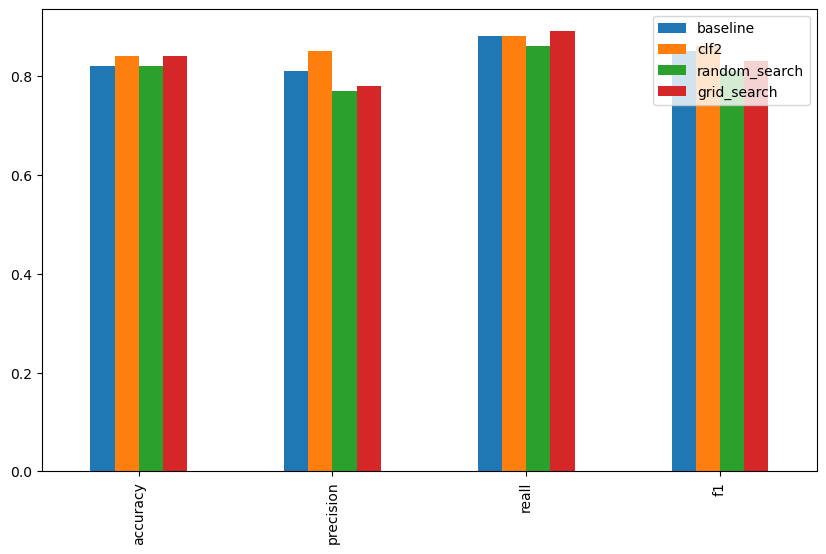

In [50]:
compare_metrics = pd.DataFrame({'baseline': baseline_metric,
                               'clf2': clf2_metrics,
                               'random_search': rs_metric,
                               'grid_search': gs_metric}
                              )
compare_metrics.plot.bar(figsize=(10, 6))

# finally putting an end to imporve a model section